In [1]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split

In [2]:
#Importing Train_data
df=pd.read_csv('agri.csv',sep='	')

In [3]:
df.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1


In [4]:
#CHECKING for NULL values
df.isnull().sum()

ID                           0
Estimated_Insects_Count      0
Crop_Type                    0
Soil_Type                    0
Pesticide_Use_Category       0
Number_Doses_Week            0
Number_Weeks_Used          442
Number_Weeks_Quit            0
Season                       0
Crop_Damage                  0
dtype: int64

In [5]:
#Now we will replace missing value -by using- Simple Imputer
from sklearn.impute import SimpleImputer
imp=SimpleImputer(missing_values=np.NaN,strategy='mean')
df['Number_Weeks_Used']=imp.fit_transform(df[['Number_Weeks_Used']])

In [6]:
#CHECKING for NULL values
df.isnull().sum()

ID                         0
Estimated_Insects_Count    0
Crop_Type                  0
Soil_Type                  0
Pesticide_Use_Category     0
Number_Doses_Week          0
Number_Weeks_Used          0
Number_Weeks_Quit          0
Season                     0
Crop_Damage                0
dtype: int64

# Therefore we have successfully removed null values

In [7]:
#Droppind 'ID' Column, as it is not necessary for our analysis.
df.drop('ID',axis=1,inplace=True)

In [8]:
df.head()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,188,1,0,1,0,0.0,0,1,0
1,209,1,0,1,0,0.0,0,2,1
2,257,1,0,1,0,0.0,0,2,1
3,257,1,1,1,0,0.0,0,2,1
4,342,1,0,1,0,0.0,0,2,1


C:\Users\RK\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


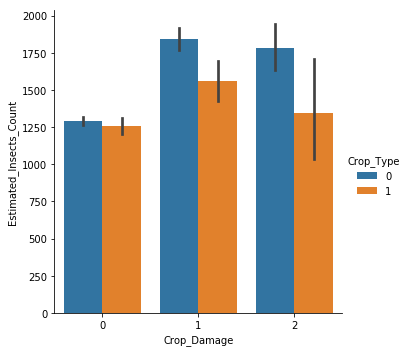

In [9]:
sns.catplot(x="Crop_Damage", y="Estimated_Insects_Count", hue="Crop_Type", kind="bar", data=df)

<Figure size 720x1440 with 0 Axes>

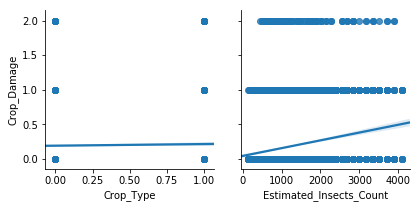

In [10]:
# Response of 5 bands TELESCOPE v/s CLASS
plt.figure(figsize = (10, 20))
sns.pairplot(df, x_vars=['Crop_Type','Estimated_Insects_Count'], y_vars='Crop_Damage',height=3, kind='reg')

# Therefore we can say that 'crop damage' is having +ve correlation with 'Estimated Insects Count' as the no. of insects count increases above 1200, the crop is more likely to get damaged.

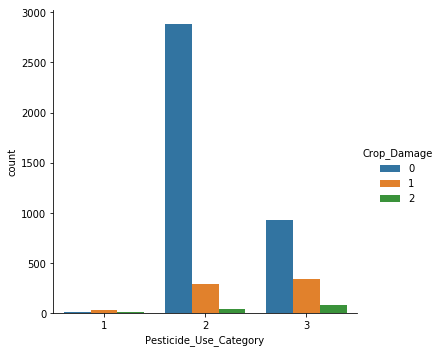

In [11]:
sns.catplot(x="Pesticide_Use_Category",hue="Crop_Damage", kind="count", data=df)

# Highest no. of Alive/Not Damaged crops that we are getting is from Previously Used type Pesticide. 

In [12]:
df['Soil_Type'].value_counts()

0    2407
1    2192
Name: Soil_Type, dtype: int64

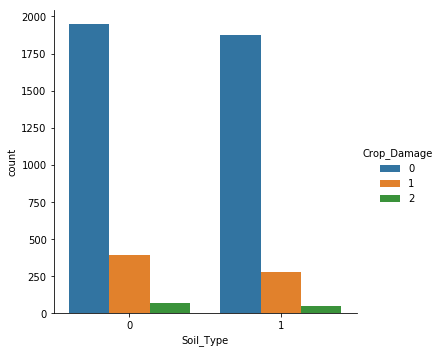

In [13]:
sns.catplot(x="Soil_Type", hue="Crop_Damage", kind="count",data=df)

# Both Soil are good for Crop,but some how SOIL type 0 is better.

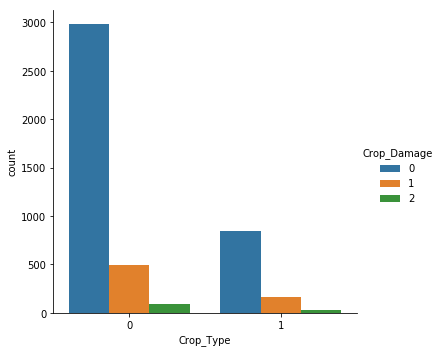

In [14]:
sns.catplot(x="Crop_Type",hue="Crop_Damage", kind="count", data=df)

# 'Crop_Type:0' is less damaged than 'Crop_Type:1',i.e, Crop 0 is having more chances of staying alive without getting damaged.

Crop 0 is affected more by 'other reasons' than 'pesticide'.

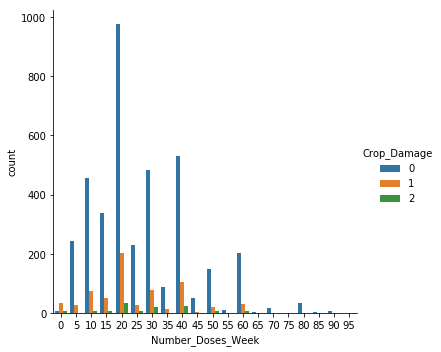

In [15]:
sns.catplot(x="Number_Doses_Week",hue="Crop_Damage", kind="count", data=df)

# We are getting Maximum no. of alive crops(Not damaged) by giving 20 'Number_Doses_week'.

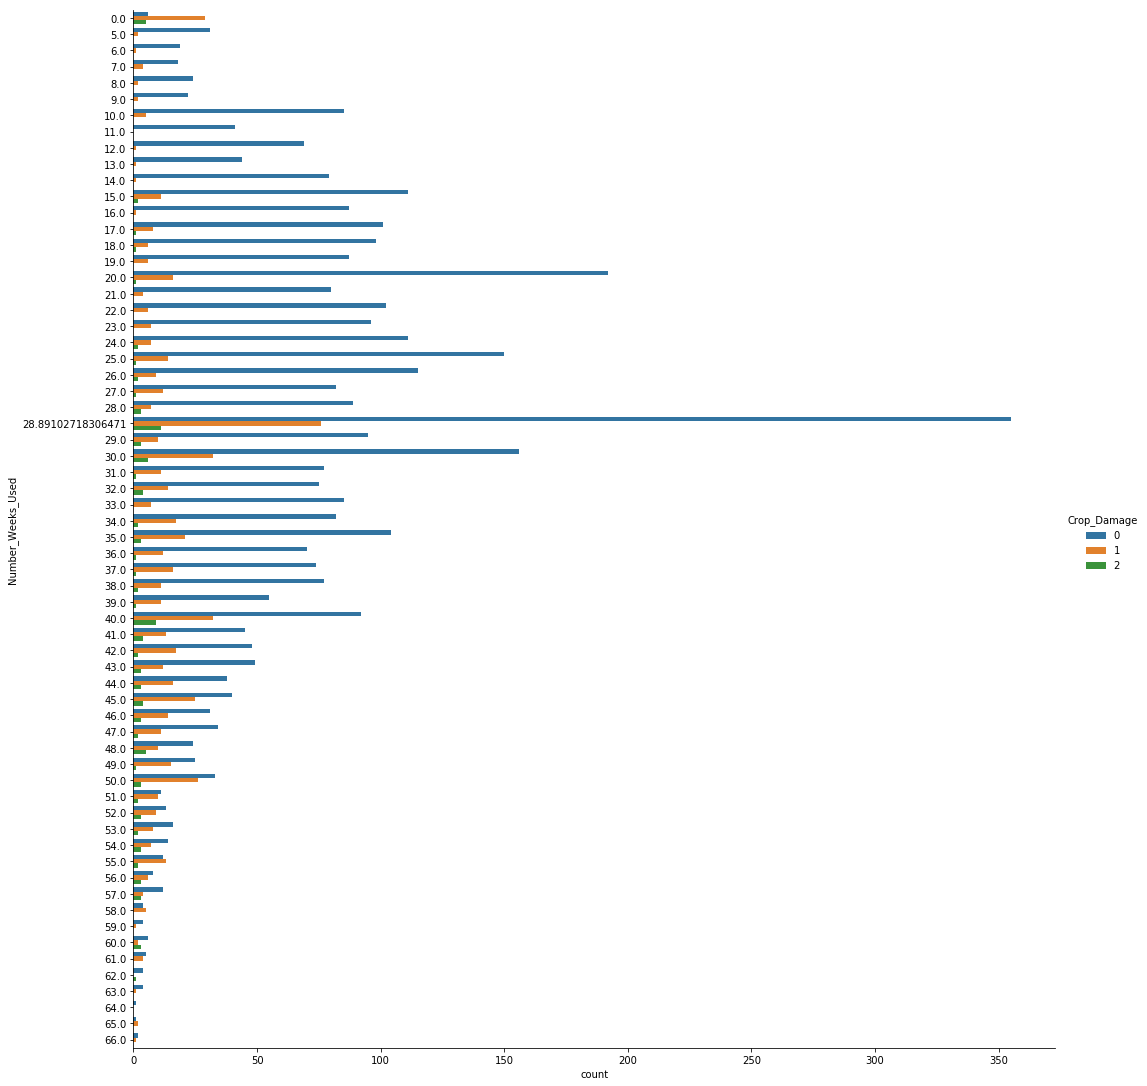

In [16]:
sns.catplot(y="Number_Weeks_Used",hue="Crop_Damage",height=15, aspect=1, kind="count", data=df)

# We are getting hisghet no. of alive crops when we use 28-29 'Number of weeks' for cropping.

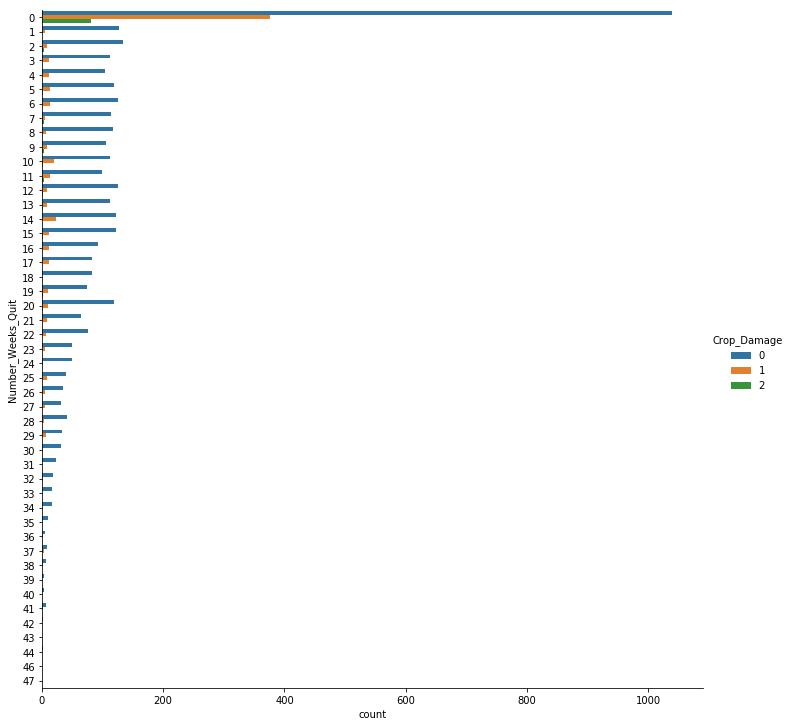

In [17]:
sns.catplot(y="Number_Weeks_Quit",hue="Crop_Damage",height=10, aspect=1, kind="count", data=df)

# '0 Number_Weeks_Quit' is having hisghest no. of alive crops.

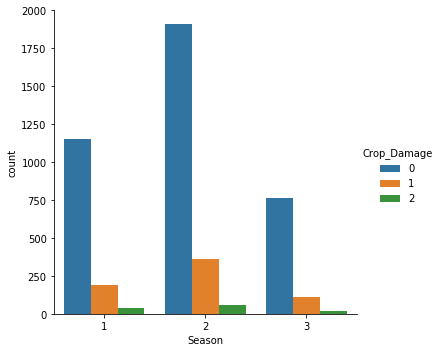

In [18]:
sns.catplot(x="Season",hue="Crop_Damage",height=5, aspect=1, kind="count", data=df)

-->Highest No. of alive crops and damaged crops are in Season-2.            
-->Lowest No. of alive crops and damaged crops are in Season-3.

# We can say that Season 2 is most Favourable for agriculture.

In [19]:
df.describe()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
count,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000
mean,1363.000435,0.224831,0.476625,2.283540,26.477495,28.891027,9.205479,1.894325,0.194390
std,814.439120,0.417517,0.499508,0.471978,15.524647,11.965785,9.713253,0.694952,0.454597
min,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,731.000000,0.000000,0.000000,2.000000,15.000000,20.000000,0.000000,1.000000,0.000000
50%,1212.000000,0.000000,0.000000,2.000000,20.000000,28.891027,7.000000,2.000000,0.000000
75%,1786.000000,0.000000,1.000000,3.000000,40.000000,36.000000,16.000000,2.000000,0.000000
max,4097.000000,1.000000,1.000000,3.000000,95.000000,66.000000,47.000000,3.000000,2.000000


---->'Estimated_Insects_Count' is having highest Std.Deviation.                     
---->max count: 4097 for 'Estimated_Insects_Count'.                         
---->Average 'No. of weeks used' for agriculture is 28.89.

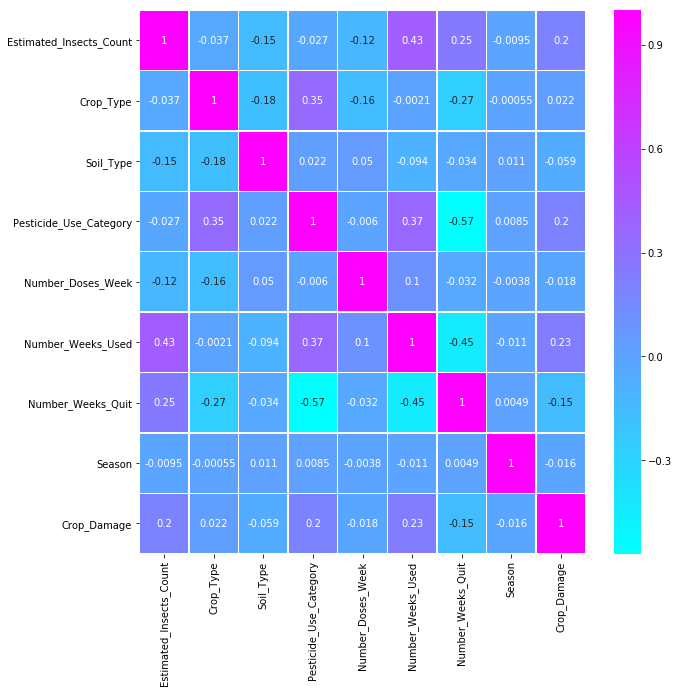

In [20]:
plt.figure(figsize = (10,10))
sns.heatmap(df.corr(),annot=True,cmap='cool',lw=0.5)

--->Crop_Damage is having -ve correlation with Number_weeks_Quit.                  
--->Pesticide_Use_Category is having -ve correlation with Number_weeks_Quit.                  
--->Number_weeks_Used is having -ve correlation with Number_weeks_Quit.

In [21]:
#Checking for skewness.
df.skew()

Estimated_Insects_Count    0.911469
Crop_Type                  1.318693
Soil_Type                  0.093631
Pesticide_Use_Category     0.678586
Number_Doses_Week          0.945895
Number_Weeks_Used          0.278664
Number_Weeks_Quit          0.919771
Season                     0.144841
Crop_Damage                2.306933
dtype: float64

# There is no skewness present except for 2(Crop_Type & Crop_Damage).We will not remove skewness as both our categorical data

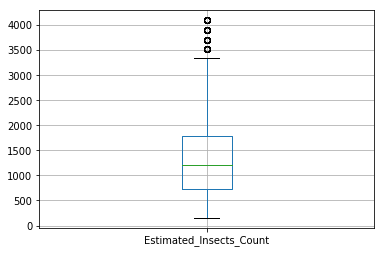

In [22]:
#Checking for OUTLIERS
df.boxplot('Estimated_Insects_Count')

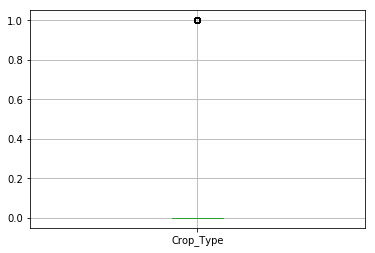

In [23]:
#Checking for OUTLIERS
df.boxplot('Crop_Type')

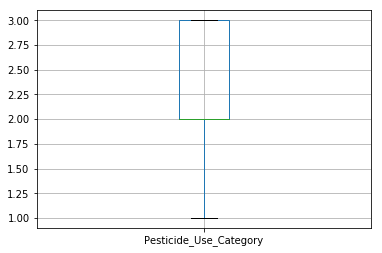

In [24]:
#Checking for OUTLIERS
df.boxplot('Pesticide_Use_Category')

In [25]:
#NOW we will remove the OUTLIERS
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[1.44286807, 1.85681868, 0.95429408, ..., 0.94782668, 1.28702725,
        0.42765624],
       [1.41708065, 1.85681868, 0.95429408, ..., 0.94782668, 0.15207762,
        1.77233374],
       [1.35813798, 1.85681868, 0.95429408, ..., 0.94782668, 0.15207762,
        1.77233374],
       ...,
       [1.11008649, 0.53855555, 1.04789501, ..., 1.83218282, 0.15207762,
        0.42765624],
       [1.11008649, 0.53855555, 1.04789501, ..., 1.52329287, 0.15207762,
        0.42765624],
       [1.11008649, 0.53855555, 1.04789501, ..., 0.80254967, 0.15207762,
        0.42765624]])

In [26]:
threshold=3
print(np.where(z>3))

(array([   7,    9,   14,   22,   23,  100,  103,  112,  149,  165,  166,
        167,  179,  185,  186,  197,  207,  222,  223,  242,  248,  252,
        264,  265,  290,  296,  305,  316,  325,  346,  351,  355,  361,
        374,  375,  377,  384,  453,  458,  466,  480,  510,  517,  522,
        557,  595,  612,  634,  693,  702,  703,  704,  705,  706,  807,
        819,  855,  856,  911,  944,  978,  980,  998, 1017, 1019, 1067,
       1097, 1178, 1212, 1291, 1307, 1324, 1326, 1327, 1329, 1337, 1339,
       1340, 1341, 1342, 1343, 1344, 1345, 1346, 1347, 1347, 1348, 1349,
       1406, 1443, 1457, 1489, 1523, 1589, 1652, 1654, 1737, 1807, 1868,
       2019, 2043, 2090, 2136, 2139, 2140, 2165, 2170, 2171, 2174, 2183,
       2185, 2188, 2190, 2190, 2191, 2192, 2193, 2194, 2237, 2392, 2553,
       2565, 2585, 2589, 2590, 2590, 2591, 2615, 2663, 2671, 2696, 2702,
       2710, 2714, 2716, 2723, 2767, 2779, 2792, 2796, 2797, 2804, 2806,
       2814, 2828, 2829, 2834, 2841, 2842, 2851, 2

In [27]:
df_new=df[(z<3).all(axis=1)]
print(df.shape)
print(df_new.shape)

(4599, 9)
(4370, 9)


# Therefore we have removed OUTLIERS

In [28]:
df=df_new

In [29]:
#Segregating the data for Model Training
df_x=df.drop('Crop_Damage',axis=1)
y=df['Crop_Damage']
print(df_x.shape)
print(y.shape)

(4370, 8)
(4370,)


In [30]:
#Scaling the Input
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)

C:\Users\RK\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\RK\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [31]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30)

In [32]:
print('x_train:',x_train.shape)
print('y_train:',y_train.shape)
print('x_test:',x_test.shape)
print('y_test:',y_test.shape)

x_train: (3059, 8)
y_train: (3059,)
x_test: (1311, 8)
y_test: (1311,)


In [33]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [34]:
#Selecting the best model
from sklearn.model_selection import cross_val_score
model=[SVC(),KNeighborsClassifier(),DecisionTreeClassifier(),LogisticRegression()]
for m in model:
    score=cross_val_score(m,x,y,cv=4,scoring='accuracy')
    print("Score of",m,"is:")
    print('Score:',score)
    print('Mean Score:',score.mean())
    print('standard deviation:',score.std())
    print('**********************************************************************************************************')
    print('\n')

C:\Users\RK\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\RK\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\RK\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\RK\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The defa

Score of SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False) is:
Score: [0.85910339 0.85269899 0.83531565 0.85426214]
Mean Score: 0.8503450421522513
standard deviation: 0.008992721106938195
**********************************************************************************************************


Score of KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform') is:
Score: [0.80695334 0.84354986 0.79780421 0.84509624]
Mean Score: 0.8233509131939524
standard deviation: 0.021227172612926132
**********************************************************************************************************


Score of DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_fe

C:\Users\RK\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\RK\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\RK\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\RK\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


# Here SVC() is having highest mean accuracy score of 85%, Now we will find the best parameters for SVC

In [35]:
#Finding the best parameters for our algorithm
from sklearn.model_selection import GridSearchCV
svc=SVC(gamma='scale')
parameters={'C':[1,0.1,0.001],'kernel':['linear', 'poly', 'rbf', 'sigmoid']}
clf=GridSearchCV(svc,parameters)
clf.fit(x,y)
clf.best_params_

C:\Users\RK\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


{'C': 0.1, 'kernel': 'poly'}

In [36]:
svc=SVC(C=0.1,kernel='poly')

In [37]:
svc.fit(x_train,y_train)

C:\Users\RK\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='poly', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [38]:
svc.score(x_train,y_train)

0.8532200065380844

In [39]:
pred=svc.predict(x_test)

In [40]:
print('Accuracy Score:       ',accuracy_score(y_test,pred))

Accuracy Score:        0.8718535469107551


In [41]:
from sklearn.ensemble import RandomForestClassifier

In [42]:
rf=RandomForestClassifier()

In [43]:
rf.fit(x_train,y_train)

C:\Users\RK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [44]:
rf.score(x_train,y_train)

0.9810395554102648

In [45]:
pred1=rf.predict(x_test)
print('Accuracy Score:       ',accuracy_score(y_test,pred1))

Accuracy Score:        0.8466819221967964


In [46]:
#now we will save the best model
import pickle
filename='model.pkl'
pickle.dump(svc,open(filename,'wb'))

# USING TEST DATA NOW

In [47]:
test_df=pd.read_csv('agri_t.csv',sep='	')

In [48]:
test_df.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,F00000002,188,1,1,1,0,NaN,0,2
1,F00000007,410,1,1,1,0,0.0,0,2
2,F00000011,626,1,0,1,0,0.0,0,2
3,F00000013,731,1,0,1,0,0.0,0,2
4,F00000014,789,0,0,1,0,0.0,0,1


In [49]:
test_df.drop('ID',axis=1,inplace=True)

In [50]:
test_df.isnull().sum()

Estimated_Insects_Count      0
Crop_Type                    0
Soil_Type                    0
Pesticide_Use_Category       0
Number_Doses_Week            0
Number_Weeks_Used          119
Number_Weeks_Quit            0
Season                       0
dtype: int64

In [51]:
test_df['Number_Weeks_Used']=imp.fit_transform(test_df[['Number_Weeks_Used']])

In [52]:
test_df.isnull().sum()

Estimated_Insects_Count    0
Crop_Type                  0
Soil_Type                  0
Pesticide_Use_Category     0
Number_Doses_Week          0
Number_Weeks_Used          0
Number_Weeks_Quit          0
Season                     0
dtype: int64

# Therefore we have removed null values.

In [53]:
fitted_model=pickle.load(open("model.pkl",'rb'))

In [54]:
fitted_model

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='poly', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [55]:
#Prediction on TEST DATA
pred2=fitted_model.predict(test_df)

In [56]:
pred2

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)